# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
# let's make a varable named 'tips',it's a  a sample dataset from seaborn
tips = sns.load_dataset('tips')

In [3]:
# lets' access the head of that dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Displot

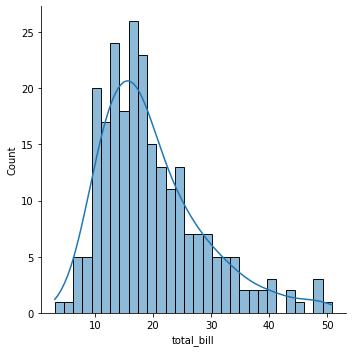

In [4]:
# now make a seaborn plot of hte row 'total_bill' from that dataset

# this a displot, essentially a histogram that allows us to visualize a distribution
sns.displot(tips['total_bill'],bins = 30,kde = True)

# bins is the number of total rods in the plot
# kde is the statistical line over the bins, it's False by default so you can't see it at 1st glance

## Jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

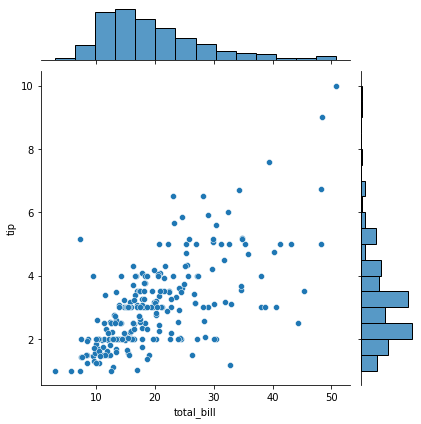

In [5]:
""" a jointplot allows us to match up 2 displots by variant data,
ing we can combine 2 different distribution plot by 2 variable """

# let's use 'total_bill' and 'tip' from the dataset into a jointplot

sns.jointplot(x='total_bill', y = 'tip', data = tips, kind = 'hex') # 'total_bill' on X axis and 'tip' in Y
# by default, the kind is 'scatter' by default, which is the design pattern of those particles in the plot
# but we're gonna use 'hex' here, which is more clear and it gets darker when the points are high
# there are other kinds like 'kde' or 'reg'
sns.jointplot(x='total_bill', y = 'tip', data = tips, kind = 'kde')
sns.jointplot(x='total_bill', y = 'tip', data = tips, kind = 'reg')


# but here we're going to use 'scatter' which comes by default
sns.jointplot(x='total_bill', y = 'tip', data = tips)

## Pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

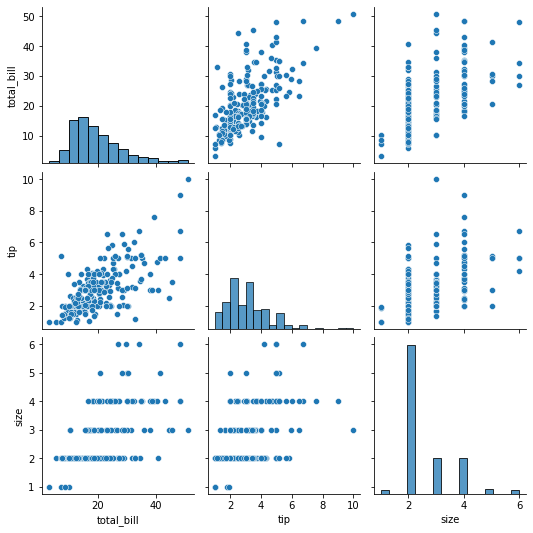

In [6]:

# we're using pairplot on the dataset 'tips'
sns.pairplot(tips)

""" KIM, the larger the dataset, the longer time 'pairplot' takes
also KIM, when comparing 2 same columns like size v size or total_bill v total_bill, 
it will be a histogram rather than a scatterplot """

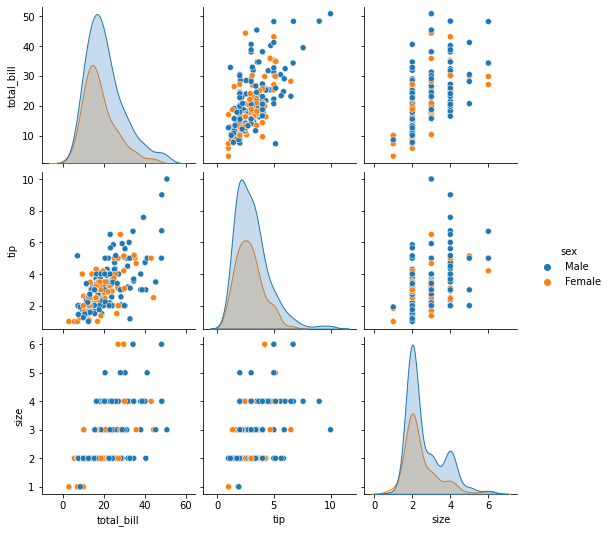

In [7]:
"""The 'hue' argument, where we pass in a catagorical column,
a catagorical column is a column which is not numerical or continues, 
but actual catagories, like the 'sex' column which is catagorised by two catagory, 'Male' and 'Female' """

sns.pairplot(tips, hue= 'sex')

## Rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

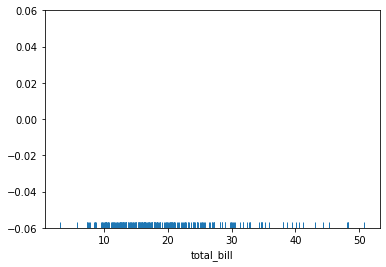

In [8]:

# it's works same as displot, it's just draws dashmark for every single point along the distribution line
sns.rugplot(tips['total_bill'])

## KDEPlot or Kernel Density Estimation Plot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

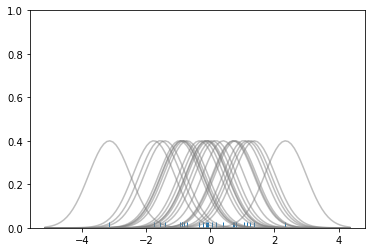

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset)

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

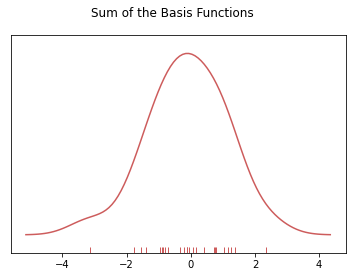

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")